In [1]:
from minisom import MiniSom
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib.pylab import *
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
data = xr.open_dataset('raw_data.nc4')
data

<xarray.Dataset>
Dimensions:        (latitude: 77897600, minPressure: 77897600, precipitation: 77897600, radius: 77897600, sst: 77897600, theta: 77897600)
Coordinates:
  * precipitation  (precipitation) float64 0.9693 0.62 0.46 ... 1.36 0.98 0.0
  * radius         (radius) float64 748.6 729.4 710.7 ... 703.3 722.4 742.0
  * theta          (theta) float64 0.6215 0.6481 0.6761 ... 1.04 1.011 0.9845
  * minPressure    (minPressure) float32 997.0 997.0 997.0 ... 998.0 998.0 998.0
  * latitude       (latitude) float32 -12.3 -12.3 -12.3 ... -16.4 -16.4 -16.4
  * sst            (sst) float32 29.06 29.06 29.06 29.06 ... 29.71 29.71 29.71
Data variables:
    *empty*

In [3]:
idx = np.where(data.radius <= 500)[0]

In [4]:
pmin = data.minPressure.values[idx].reshape(-1,1)
lat = data.latitude.values[idx].reshape(-1,1)
sst = data.sst.values[idx].reshape(-1,1)
dist = data.radius[idx].values.reshape(-1,1)
ang = data.theta.values[idx].reshape(-1,1)

In [5]:
variables = {'Precipitation': data.precipitation.values[idx].reshape(-1,1).ravel(),
             'Radius': dist.ravel(),
             'Theta': ang.ravel(),
             'MinPressure': pmin.ravel(),
             'SST': sst.ravel() ,
             'Latitude': lat.ravel()}

data = pd.DataFrame(variables, columns = ['Precipitation','Radius', 'Theta', 'MinPressure', 'SST', 'Latitude'])
data = data.dropna()

In [6]:
data = data[data.MinPressure > 0]
data.shape

(48308423, 6)

In [7]:
unique, counts = np.unique(data.MinPressure, return_counts= True)#135
unique

array([ 872.,  878.,  882.,  885.,  886.,  890.,  892.,  895.,  896.,
        897.,  899.,  900.,  901.,  902.,  903.,  904.,  905.,  906.,
        907.,  908.,  909.,  910.,  912.,  913.,  914.,  915.,  916.,
        917.,  918.,  919.,  920.,  921.,  922.,  923.,  924.,  925.,
        926.,  927.,  928.,  929.,  930.,  931.,  932.,  933.,  934.,
        935.,  936.,  937.,  938.,  939.,  940.,  941.,  942.,  943.,
        944.,  945.,  946.,  947.,  948.,  949.,  950.,  951.,  952.,
        953.,  954.,  955.,  956.,  957.,  958.,  959.,  960.,  961.,
        962.,  963.,  964.,  965.,  966.,  967.,  968.,  969.,  970.,
        971.,  972.,  973.,  974.,  975.,  976.,  977.,  978.,  979.,
        980.,  981.,  982.,  983.,  984.,  985.,  986.,  987.,  988.,
        989.,  990.,  991.,  992.,  993.,  994.,  995.,  996.,  997.,
        998.,  999., 1000., 1001., 1002., 1003., 1004., 1005., 1006.,
       1007., 1008., 1009., 1010., 1011., 1012., 1013., 1014., 1015.,
       1016., 1017.,

In [8]:
lista = []
for i in range(0,135,2):
    lista.append(unique[i])
unique = np.setdiff1d(unique,lista)
for i in range(0,67,2):
    lista.append(unique[i])
pres = np.array(lista)
pres = np.sort(pres[2:102])
pres

array([ 878.,  886.,  890.,  892.,  896.,  897.,  899.,  901.,  902.,
        903.,  905.,  906.,  907.,  909.,  910.,  912.,  914.,  915.,
        916.,  918.,  919.,  920.,  922.,  923.,  924.,  926.,  927.,
        928.,  930.,  931.,  932.,  934.,  935.,  936.,  938.,  939.,
        940.,  942.,  943.,  944.,  946.,  947.,  948.,  950.,  951.,
        952.,  954.,  955.,  956.,  958.,  959.,  960.,  962.,  963.,
        964.,  966.,  967.,  968.,  970.,  971.,  972.,  974.,  975.,
        976.,  978.,  979.,  980.,  982.,  983.,  984.,  986.,  987.,
        988.,  990.,  991.,  992.,  994.,  995.,  996.,  998.,  999.,
       1000., 1002., 1003., 1004., 1006., 1007., 1008., 1010., 1011.,
       1012., 1014., 1015., 1016., 1018., 1019., 1020., 1022., 1023.,
       1024.], dtype=float32)

In [9]:
id1 = np.unique(data.SST)[np.unique(data.SST)-np.unique(data.SST).astype(int) == 0]
id2 = np.unique(data.SST)[np.unique(data.SST)-np.unique(data.SST).astype(int) == 0.25]
id3 = np.unique(data.SST)[np.unique(data.SST)-np.unique(data.SST).astype(int) == 0.5]
id4 = np.unique(data.SST)[np.unique(data.SST)-np.unique(data.SST).astype(int) == 0.75]
id5 = np.unique(data.SST)[np.round(np.unique(data.SST)-np.unique(data.SST).astype(int),decimals = 2) == 0.1]

In [10]:
sst = np.sort(np.concatenate((id1,id2,id3,id4,id5)))
sst

array([ 3.25    ,  3.5     ,  7.1     ,  7.5     ,  8.099999,  9.099999,
        9.25    ,  9.5     ,  9.75    , 10.      , 10.099999, 10.5     ,
       10.75    , 11.25    , 12.099999, 12.25    , 13.      , 13.099999,
       13.25    , 13.75    , 14.      , 14.25    , 14.75    , 15.25    ,
       15.75    , 16.      , 16.25    , 17.      , 17.1     , 17.25    ,
       17.5     , 17.75    , 18.      , 18.1     , 18.25    , 18.5     ,
       18.75    , 19.      , 19.1     , 19.25    , 19.5     , 19.75    ,
       20.      , 20.1     , 20.25    , 20.5     , 20.75    , 21.      ,
       21.1     , 21.25    , 21.5     , 21.75    , 22.      , 22.1     ,
       22.25    , 22.5     , 22.75    , 23.      , 23.1     , 23.25    ,
       23.5     , 23.75    , 24.      , 24.1     , 24.25    , 24.5     ,
       24.75    , 25.      , 25.1     , 25.25    , 25.5     , 25.75    ,
       26.      , 26.099998, 26.25    , 26.5     , 26.75    , 27.      ,
       27.099998, 27.25    , 27.5     , 27.75    , 

In [11]:
id1 = np.unique(np.abs(data.Latitude))[np.unique(np.abs(data.Latitude))-np.unique(np.abs(data.Latitude)).astype(int) == 0]
id2 = np.unique(np.abs(data.Latitude))[np.unique(np.abs(data.Latitude))-np.unique(np.abs(data.Latitude)).astype(int) == 0.5]
lat = np.sort(np.concatenate((id1,id2)))[:100]
lat

array([ 1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,
        7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ,
       12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5,
       18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5, 23. ,
       23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5,
       29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. ,
       34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. , 39.5,
       40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5, 45. ,
       45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5, 50. , 50.5,
       51. ], dtype=float32)

In [12]:
id_pres = data.MinPressure[data.MinPressure.isin(pres)].index
id_sst = data.SST[data.SST.isin(sst)].index
id_lat = data.Latitude[np.abs(data.Latitude).isin(lat)].index
idx = np.intersect1d(np.intersect1d(id_pres,id_lat),id_sst)
idx.shape

(524698,)

In [13]:
max_pres = data.MinPressure.max()
min_pres = data.MinPressure.min()
max_sst = data.SST.max()
min_sst = data.SST.min()
max_lat = np.abs(data.Latitude).max()
min_lat = np.abs(data.Latitude).min()

In [14]:
data.MinPressure = (data.MinPressure - data.MinPressure.min())/(data.MinPressure.max()-data.MinPressure.min())
data.SST = (data.SST - data.SST.min())/(data.SST.max()-data.SST.min())
data.Latitude = np.abs(data.Latitude)
data.Latitude = (data.Latitude - data.Latitude.min())/(data.Latitude.max()-data.Latitude.min())

data

,Precipitation,Radius,Theta,MinPressure,SST,Latitude
0,0.300000,496.792241,1.107676,0.822368,0.897084,0.196043
1,0.380000,489.578149,1.160811,0.822368,0.897084,0.196043
2,0.740000,483.837001,1.215370,0.822368,0.897084,0.196043
3,0.560000,479.621596,1.271073,0.822368,0.897084,0.196043
4,0.900000,476.972298,1.327603,0.822368,0.897084,0.196043
...,...,...,...,...,...,...
53011548,1.745791,489.037709,1.813848,0.828947,0.919383,0.269784
53011549,0.000000,488.724568,1.759242,0.828947,0.919383,0.269784
53011550,0.000000,489.972732,1.704670,0.828947,0.919383,0.269784
53011551,0.000000,492.770227,1.650453,0.828947,0.919383,0.269784


In [15]:
datos = data.loc[idx]

In [16]:
data

,Precipitation,Radius,Theta,MinPressure,SST,Latitude
0,0.300000,496.792241,1.107676,0.822368,0.897084,0.196043
1,0.380000,489.578149,1.160811,0.822368,0.897084,0.196043
2,0.740000,483.837001,1.215370,0.822368,0.897084,0.196043
3,0.560000,479.621596,1.271073,0.822368,0.897084,0.196043
4,0.900000,476.972298,1.327603,0.822368,0.897084,0.196043
...,...,...,...,...,...,...
53011548,1.745791,489.037709,1.813848,0.828947,0.919383,0.269784
53011549,0.000000,488.724568,1.759242,0.828947,0.919383,0.269784
53011550,0.000000,489.972732,1.704670,0.828947,0.919383,0.269784
53011551,0.000000,492.770227,1.650453,0.828947,0.919383,0.269784


In [17]:
data.MinPressure = data.MinPressure*(max_pres-min_pres) + min_pres
data.SST = data.SST*(max_sst-min_sst) + min_sst
data.Latitude = data.Latitude*(max_lat-min_lat) + min_lat
data

,Precipitation,Radius,Theta,MinPressure,SST,Latitude
0,0.300000,496.792241,1.107676,997.0,29.059999,12.3
1,0.380000,489.578149,1.160811,997.0,29.059999,12.3
2,0.740000,483.837001,1.215370,997.0,29.059999,12.3
3,0.560000,479.621596,1.271073,997.0,29.059999,12.3
4,0.900000,476.972298,1.327603,997.0,29.059999,12.3
...,...,...,...,...,...,...
53011548,1.745791,489.037709,1.813848,998.0,29.709999,16.4
53011549,0.000000,488.724568,1.759242,998.0,29.709999,16.4
53011550,0.000000,489.972732,1.704670,998.0,29.709999,16.4
53011551,0.000000,492.770227,1.650453,998.0,29.709999,16.4


In [18]:
som = MiniSom(20,20,3,sigma=1, learning_rate=.75,
             neighborhood_function='gaussian', random_seed=10)
starting_weights = som.get_weights().copy()
som.pca_weights_init(datos[['MinPressure','SST','Latitude']].values)
som.train_random(datos[['MinPressure','SST','Latitude']].values, 1000000, verbose=True)

 [     232 / 1000000 ]   0% - 0:12:57 left 

 [ 1000000 / 1000000 ] 100% - 0:00:00 left 
 quantization error: 0.014263551238269974


In [19]:
data = data[['MinPressure','SST','Latitude']]
data

,MinPressure,SST,Latitude
0,997.0,29.059999,12.3
1,997.0,29.059999,12.3
2,997.0,29.059999,12.3
3,997.0,29.059999,12.3
4,997.0,29.059999,12.3
...,...,...,...
53011548,998.0,29.709999,16.4
53011549,998.0,29.709999,16.4
53011550,998.0,29.709999,16.4
53011551,998.0,29.709999,16.4


In [20]:
centroides = som.get_weights()

In [21]:
centroides[:,:,0] = centroides[:,:,0]*(max_pres-min_pres) + min_pres
centroides[:,:,1] = centroides[:,:,1]*(max_sst-min_sst) + min_sst
centroides[:,:,2] = centroides[:,:,2]*(max_lat-min_lat) + min_lat

In [22]:
centroides=centroides.reshape(400,3)

In [23]:
variables = {'MinPressure': centroides[:,0],
             'SST': centroides[:,1] ,
             'Latitude': centroides[:,2]}

centroides = pd.DataFrame(variables, columns = ['MinPressure', 'SST', 'Latitude'])
centroides

,MinPressure,SST,Latitude
0,910.344091,28.999252,17.734063
1,915.335469,28.496581,16.058550
2,929.844197,28.263174,17.033012
3,939.450748,28.409958,15.049763
4,945.554533,28.216305,14.398736
...,...,...,...
395,999.169240,23.115821,23.066914
396,1002.028602,22.029365,21.776884
397,1006.219005,21.283212,21.017713
398,1007.040064,21.012260,23.297694


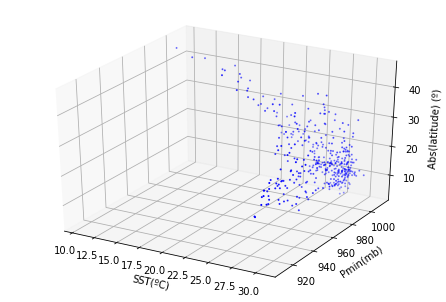

In [24]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(centroides.SST.values, centroides.MinPressure.values, centroides.Latitude.values, s=1, color = 'b')
ax.set_xlabel('SST(ºC)')
ax.set_ylabel('Pmin(mb)')
ax.set_zlabel('Abs(latitude) (º)')
pyplot.show()

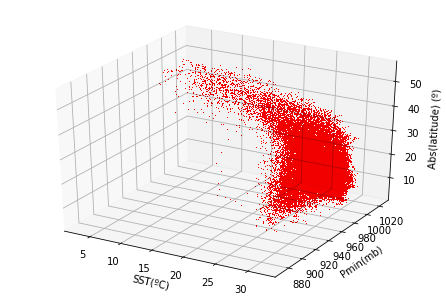

In [25]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.plot(data.SST.values, data.MinPressure.values, data.Latitude.values,'.', markersize=0.01, color = 'r')
ax.set_xlabel('SST(ºC)')
ax.set_ylabel('Pmin(mb)')
ax.set_zlabel('Abs(latitude) (º)')
pyplot.show()

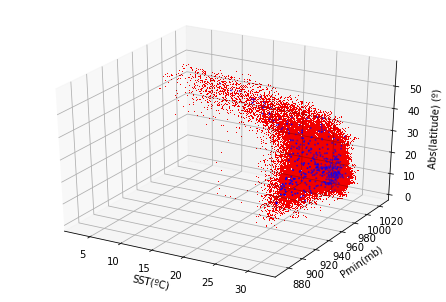

In [26]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.plot(data.SST.values, data.MinPressure.values, data.Latitude.values,'.', markersize=0.01, color = 'r')
ax.scatter(centroides.SST.values, centroides.MinPressure.values, centroides.Latitude.values, s=1, color = 'b')
ax.set_xlabel('SST(ºC)')
ax.set_ylabel('Pmin(mb)')
ax.set_zlabel('Abs(latitude) (º)')

pyplot.show()

In [27]:
fig.savefig('3dscatter_20x20_fino.png')